# K - Means Clustering

Let us talk about K-Means Clustering Algorithm, This is an Unsupervised Learning Techinque where you have a collection of things you want to group together into various clusters. May be its Movie Genres, Demographic of people etc.

K-Means Clustering is a very common technique in machine learning where you just try to take a bunch of data and find interesting clusters just based on the attributes of the data itself.

All we do in K-Means Clustering is try to split our data into K groups and this is done by finding K Centroids. Basically, What group a given data point belongs to is defined by which of these centroid points its closest to in your scatter plot.

K-Means Clustering Algorithm Steps

1. Randomly pick K centroids (k-means): We start off with a randomly chosen set of centroids. So if we have a K of three we're going to look for three clusters in our group, and we will assign three randomly positioned centroids in our scatter plot.
2. Assign each data point to the centroid it is closest to: We then assign each data point to the randomly assigned centroid that it is closest to.
3. Recompute the centroids based on the average position of each centroid's points: Then recompute the centroid for each cluster that we come up with. That is, for a given cluster that we end up with, we will move that centroid to be the actual center of all those points.
4. Iterate until points stop changing assignment to centroids: We will do it all again until those centroids stop moving, we hit some threshold value that says OK, we have converged on something here.
5. Predict the cluster for new points: To predict the clusters for new points that I haven't seen before, we can just go through our centroid locations and figure out which centroid it's closest to to predict its cluster.

K-Means CLustering Limitations

1. Choosing K: First of all, we need to choose the right value of K, and that's not a straightforward thing to do at all. The principal way of choosing K is to just start low and keep increasing the value of K depending on how many groups you want, until you stop getting large reductions in squared error. If you look at the distances from each point to their centroids, you can think of that as an error metric. At the point where you stop reducing that error metric, you know you probably have too many clusters. So you're not really gaining any more information by adding additional clusters at that point.
2. Avoiding local minima: Also, there is a problem of local minima. You could just get very unlucky with those initial choices of centroids and they might end up just converging on local phenomena instead of more global clusters, so usually, you want to run this a few times and maybe average the results together. We call that ensemble learning. We'll talk about that more a little bit later on, but it's always a good idea to run k-means more than once using a different set of random initial values and just see if you do in fact end up with the same overall results or not.
3. Labeling the clusters: Finally, the main problem with k-means clustering is that there's no labels for the clusters that you get. It will just tell you that this group of data points are somehow related, but you can't put a name on it. It can't tell you the actual meaning of that cluster. Let's say I have a bunch of movies that I'm looking at, and k-means clustering tells me that bunch of science fiction movies are over here, but it's not going to call them "science fiction" movies for me. It's up to me to actually dig into the data and figure out, well, what do these things really have in common? How might I describe that in English? That's the hard part, and k-means won't help you with that. So again, scikitlearn makes it very easy to do this.

# Clustering People based on Income and Age

We need some random data for us to implement our K-Means Clustering. Just to make it easier we will build some actual cluster into our fake data set. So to do that we will build the createClusteredData() function in Python.

The function starts off with a consistent random seed so its reproducible, We want to create clusters of N people in K clusters. So we pass N and K to the function as arguments.

Our code figures out hwo many points per cluster that works out to first and stores it in pointsPerCluster. Then it builds up list x that starts off empty. for each cluster we are going to create some random centroid of income (incomeCentroid) between 20000 and 200000 dollars and some random centroid of age (ageCentroid) between 20 and 70.

Then for each random centriod we created, we will create a normally distributed set of random data woth standard deviation of 10000 and standard deviation of 2 in age, That gives us bunch of age and income data that is centered around the pre existing cluster centers that we had defined.

In [6]:
from numpy import random, array
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0),
            random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

Now lets build the K-Means Clustering Model. First let us import KMeans from Scikit Learn's Cluster Package. We also need to import matplotlib for visualization. We use createClusteredData() function to say 100 random people around 5 clusters. so there are 5 natural clusters for the data that we are creating. We then create a K-Means model with K of 5, so we are picking 5 clusters because we know the right answer, but again since in unsupervised learning we dont necessarily know what the real value of k is, we will need to iterate and converg on it. 

One important thing with k-means is that it works best if your data is all normalized. That means everything is at the same scale. So a problem that I have here is that my ages range from 20 to 70, but my incomes range all the way up to 200,000. So these values are not really comparable. The incomes are much larger than the age values. Scale will take all that data and scale it together to a consistent scale so I can actually compare these things as apples to apples, and that will help a lot with your k-means results. 

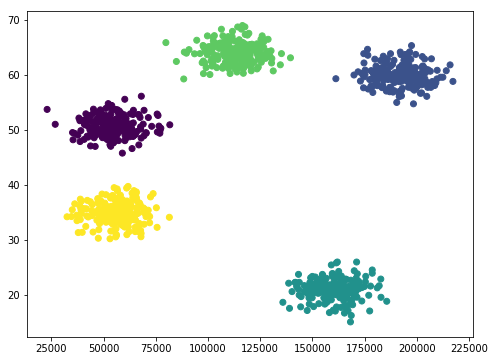

In [11]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float
data = createClusteredData(1000, 5)
model = KMeans(n_clusters=5)
# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))
# We can look at the clusters each data point was assigned to
# print (model.labels_)
# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()